Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)

Параметры для выбора :

- n_estimators: от 10 до 50 с шагом 10
- max_depth: от 1 до 12 с шагом 2
- min_samples_leaf: от 1 до 7
- min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [66]:
# Импортируем необходимые модули
# для работы с данными.
import pandas as pd
import numpy as np

In [67]:
# для построения леса деревьев решений и обучения моделей.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# для работы с графикой.
import matplotlib.pyplot as plt

In [68]:
# Считываем файл c данными о сердечных заболеваниях.
mush_data = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\training_mush.csv')
mush_data.head( )

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [69]:
mush_data.shape

(6093, 23)

In [70]:
# Отбросим колонку, которую будем предсказывать.
X = mush_data.drop(['class'], axis = 1)

In [71]:
y = mush_data['class']

In [72]:
# Создаем модель RandomForestClassifier.
rf_mush = RandomForestClassifier(random_state=0)

In [73]:
# Задаем параметры модели.
parametrs = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [1,3,5,7,9,11], 
                        'min_samples_leaf': [1,2,3,4,5,6,7], 'min_samples_split': [2,4,6,8]}


In [74]:
# Обучение Random forest моделей GridSearchCV на подмножестве train.
GridSearchCV_mush_clf = GridSearchCV(rf_mush, parametrs, cv=3, n_jobs=-1)
GridSearchCV_mush_clf.fit(X, y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [75]:
GridSearchCV_mush_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [76]:
# Проведем преобразование, позволяющее определить важность переменных.
best_mush_clf = GridSearchCV_mush_clf.best_estimator_

In [77]:
# Создадим атрибут feature_importances_mush и сохраним его в отдельную переменную.
feature_importances_mush = best_mush_clf.feature_importances_

In [78]:
# Создадим DataFrame с информацией о важности переменных.
feature_importances_mush = pd.DataFrame({'feature_importances': feature_importances_mush},
                                            index=X.columns)\
    .sort_values(by='feature_importances', ascending=True)\
    .rename(columns={'feature_importances': 'importance'})

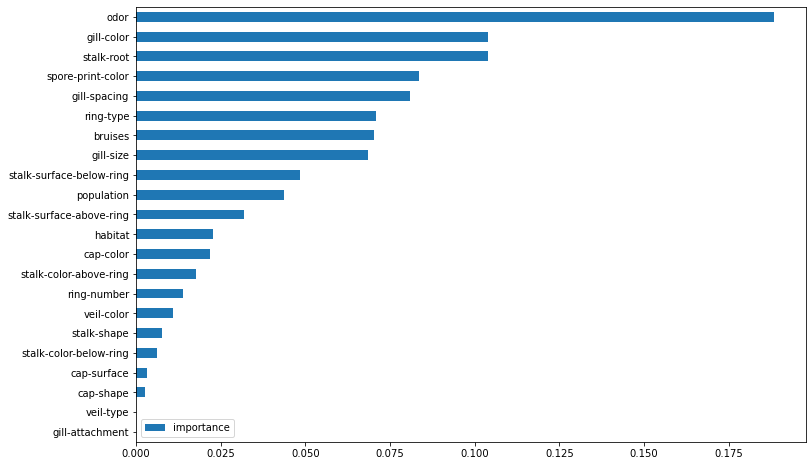

In [79]:
# Построение графика важности переменных.
feature_importances_mush.plot(kind='barh', figsize=(12, 8))
plt.show()

Вариант №2

In [48]:
import pandas as pd

# Библиотеки для машинного обучения
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Загрузка данных (верные ответы в поле class)
df = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\training_mush.csv')
X_train = df.drop('class', axis=1)
y_train = df['class']

# Объявляем классификатор и параметры для перебора
clf_RF = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators':      range(10, 50, 10),
             'max_depth':         range(1, 12, 2),
             'min_samples_leaf':  range(1, 7),
             'min_samples_split': range(2, 9, 2)}

# Запускаем обучение
clf_grid = GridSearchCV(clf_RF, param_grid=parametrs, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

# Получаем лучшие параметры от лучшей обученной модели.
print('Лучшие параметры Леса:', clf_grid.best_params_)

#  Лучшие параметры Леса: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Лучшие параметры Леса: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


Задача №2 продолжение 1ой


Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [80]:
test_mush_data = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\testing_mush.csv')
test_mush_data.head( )

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [81]:
y_predict=best_mush_clf. predict (test_mush_data)

pd.Series(y_predict).value_counts()

0    1055
1     976
dtype: int64

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [82]:
from sklearn import metrics

In [83]:
y_test = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\testing_y_mush.csv')
y_test.head( )

,class
0,0
1,0
2,1
3,1
4,1


<AxesSubplot:>

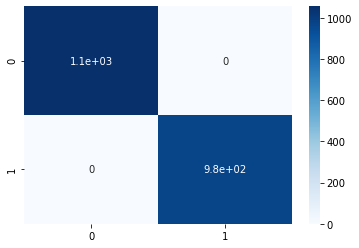

In [91]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="Blues")

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[1055,    0],
       [   0,  976]], dtype=int64)

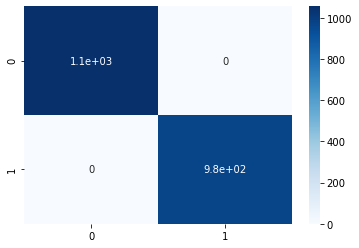

In [98]:
#Вариант №2

import zipfile
# Пароль к zip-файлу (появился при решении предыдущей задачи).
password = 'Cool!Move_forward!'
# Считываем правильные данные по съедобности грибов из запароленного архива.
z = zipfile.ZipFile("testing_y_mush.csv.zip")
txtfiles = z.namelist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

# Создание confusion matrix по предсказаниям, полученным в прошлом уроке и правильным ответам.
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="Blues")
plt.show()

Вариант решения №2

In [93]:
# Импортируем необходимые модули
# для работы с данными:
import pandas as pd

# для построения леса деревьев решений и обучения моделей:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Считываем файл c данными о съедобности грибов.
mush_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

# Отбросим колонку, которую будем предсказывать.
X = mush_data.drop(['class'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = mush_data['class']

# Создаем модель RandomForestClassifier.
rf = RandomForestClassifier(random_state=0)

# Задаем параметры модели.
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1,8), 'min_samples_split': range(2,10,2)}

# Обучение Random forest моделей GridSearchCV.
GridSearchCV_clf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
GridSearchCV_clf.fit(X, y)

# Определение наилучшего классификатора.
best_clf = GridSearchCV_clf.best_estimator_

# Считываем второй файл c данными о грибах.
mush_data_2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

# Предсказываем съедобность грибов из второго файла, используя созданный наилучший классификатор.
predictions = best_clf.predict(mush_data_2)

# Определяем число несъедобных грибов (класс равен 1).
print('Число несъедобных грибов = ', predictions.sum())

Число несъедобных грибов =  976
